## Final Project Notebook By Taittinger Gabelhart
### Created for Big Ideas in Computing [0010]

# Introduction:
- For this project I wanted to find the neighborhoods with the most public art. I came up with this because I personally enjoying going to art musems and seeing public art installations whenever I'm in a new city.  I was also considering the neighborhoods with the most amount of stairs or the lowest crime levels but ended up on the art data set.

# The Metric
- My metric is the most public art aviable in a neighborhood. I pulled the City of Pittsburgh Public Art dataset that can be found here https://data.wprdc.org/dataset/city-of-pittsburgh-public-art. My goal is to find the neighborhood with the largest amount of art in it. I personally feel like the south side or the strip district will have the most but we'll see.

# The Best Neighborhood:
- After going through the data and looking at the results I was able to determine that my first assumption was wrong it was not the South Side or the Strip District that has the most public art. It was the Central Business District with a whooping 459 pieces of public art. Below the code to find the best neighborhood that shows the how the rest of the neighborhoods stack up compared to the Central Business District.

Total number of public art in Pittsburgh: 3349
Neighborhood with the most public art:  Central Business District  with  459  pieces of public art.
Central Business District accounts for  13.705583756345177 % of the total public art in Pittsburgh.


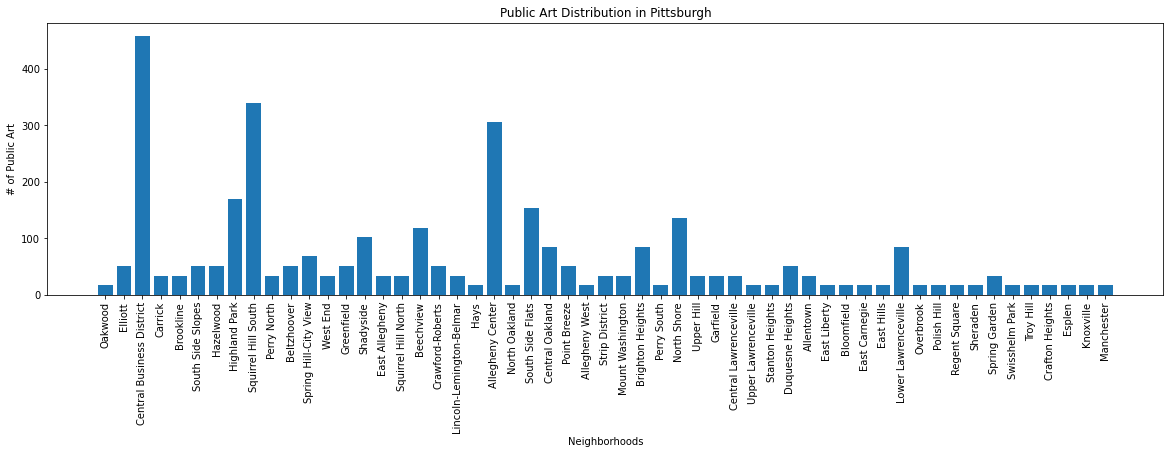

Top 5 areas for Public art: 
----------------------------
('Central Business District', 459)
('Squirrel Hill South', 340)
('Allegheny Center', 306)
('Highland Park', 170)
('South Side Flats', 153)


In [28]:
#code for finding the best neighborhood here
#import panda
import pandas as panda
import matplotlib.pyplot as plt
#read in the data from the file
#https://data.wprdc.org/datastore/dump/00d74e83-8a23-486e-841b-286e1332a151
data = panda.read_csv('art.csv')
#total number of public art in pittsburgh
total_art = int(0)
#grab all the different neighborhoods in the data set
neighborhoods = data['neighborhood'].unique()
#used to hold the neighborhood name with the most art
n_w_m_a = ""
#counter used to hold the number of art in a neighborhood
most_art = int(0)
dict = {"neighborhood":0}
#loop through all the neighborhood and find the one with 
#the largest number of public art pieces available
for neighborhood in neighborhoods:
    #build the query
    q = "neighborhood == "+ "\'" + str(neighborhood) + "\'"
    #query the data set for that specific neighborhood
    n = data.query(q)
    #update the total number of art in pittsburgh
    total_art += n.size
    
    #add the neighborhood to the dict and its size
    #check if the item is already in the dictionary
    if neighborhood in dict.keys():
        neighborhood = str(neighborhood)
        #it is, so update the quantity
        dict[neighborhood] = n.size
    else:
        neighborhood = str(neighborhood)
        #its not, so add the item to the dictionary
        dict[neighborhood] = n.size
        
    #check and see if this neighborhood is the one with the largest set size
    if(n.size > most_art):
        #grab its name
        n_w_m_a = neighborhood
        #grab the number of pieces of art in itS
        most_art = n.size

#display the found data and talk about the statistics of it
print("Total number of public art in Pittsburgh:", total_art)
print("Neighborhood with the most public art: ", n_w_m_a, " with ", most_art, " pieces of public art.")
print(n_w_m_a, "accounts for ", (float(most_art / total_art)* 100), "% of the total public art in Pittsburgh.")

#remove the two values we dont want to plot
del dict["neighborhood"]
del dict['nan']

#do data visualization here
myList = dict.items()
#items to plot
x, y = zip(*myList) 
#increase the figure size to get rid of the squish on xticks
plt.figure(figsize=(20,5))
plt.xlabel("Neighborhoods")
plt.ylabel("# of Public Art")
plt.title("Public Art Distribution in Pittsburgh")
#rotate the labels to be able to read them and stop overlap
plt.xticks(rotation=90)
#use a bar graph to better display the data
plt.bar(x, y)
#display graph
plt.show()
#now we sort the list of items and count and print out the top 5 for comparison with other group rankings
myList = list(myList)
def returnCount(e):
    return e[1]
myList.sort(key=returnCount,reverse=True)
#now loop over the sorted list contents and print out the top 5
count = 0
print("Top 5 areas for Public art: ")
print("----------------------------")
for item in myList:
    if(count < 5):
        print(item)
    else:
        break
    count = count +1

# The Conclusion:

- I ended up with the Central Business District being the best neighborhood when my metric was most public art on display in a neighborhood. I believe that having access to public art is important both for education purposes and to have something to enjoy when being outside. Some cities do not have as much green space as I would like so the next best thing in my mind would be some art to look at. My pick differs from my group partners as Pooya ended up with Regent Square using population density, home value, and income level of residents and my other group mate Micheal ended with his best neighborhood being Squirrel Hill South using the number of available playgrounds. All of our approachs are a little different but all have merit and help showcase different ways to look at what people consider the best neighborhood in Pittsburgh.